In [2]:
import numpy as np
import matplotlib.pylab as plt
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity

### Source
The data below are from https://www.engineeringtoolbox.com/air-diffusion-coefficient-gas-mixture-temperature-d_2010.html. The ambient pressure is 1 atm.

In [14]:
D = AssignQuantity([0.219, 0.242, 0.399, 0.638, 0.873, 1.135],'cm^2/s')
D.ito('micrometer^2/microsecond'); print(D)
T = AssignQuantity([0, 20, 100, 200, 300, 400],'celsius')
T = T.to('kelvin'); print(T)

[21.900000000000002 24.200000000000003 39.900000000000006 63.80000000000001 87.30000000000001 113.50000000000001] micrometer ** 2 / microsecond
[273.15 293.15 373.15 473.15 573.15 673.15] kelvin


[ 1.86121271 -7.35421981]


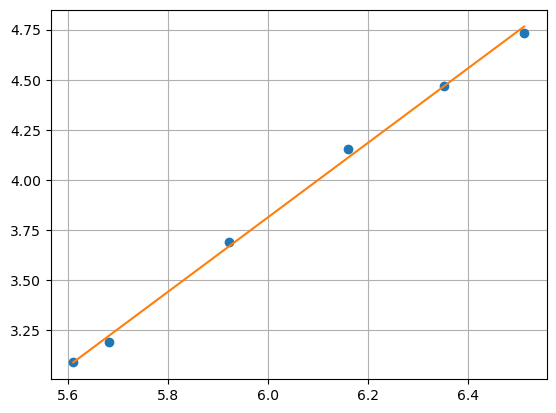

In [15]:
plt.figure()
logT = np.log(T.magnitude)
logD = np.log(D.magnitude)
plt.plot(logT,logD,'o')
plt.grid(True)
p = np.polyfit(logT,logD,1); print(p)
plt.plot(logT,np.polyval(p,logT))

### Form of the expression for $D(T)$

$$
D = exp(m \times log(T) + b)
$$

$$
D = exp(log(T^m) + b)
$$

$$
D = exp(log(T^m)) \times exp(b)
$$

$$
D = T^m \times exp(b) \times ({T_o \over T_o})^m
$$

$$
D = T_o^m \times exp(b) \times ({T \over T_o})^m
$$

$$
D = D_o \times ({T \over T_o})^m
$$

where $D_o = T_o^m \times exp(b)$


In [25]:
def getDofT_orig(T):
    m = 1.86121271
    b = -7.35421981
    logD = m*np.log(T)+b
    D = np.exp(logD)
    return D

def getDofT(T):
    To = 273.15
    m = 1.86121271
#     b = -7.35421981
#     Do = To**m * np.exp(b)
    Do = 21.91612692493907
    D = Do*(T/To)**m
    return D

def getDofTpow(T,AssignQuantity):
    """ This produces D in micrometers^2/microsecond """
    """ Assumes temperature in degrees K """

    m = 1.86121271
    b = -7.35421981
    T0 = 273
    D0 = np.exp(b)*T0**m
    D = (T.magnitude/T0)**m * D0
    
    D = AssignQuantity(D,'micrometers^2/microsecond')
    return D


D_orig = 21.916126924939054
D = 21.91612692493907
D = 21.91612692493907 micrometer ** 2 / microsecond
240 kelvin


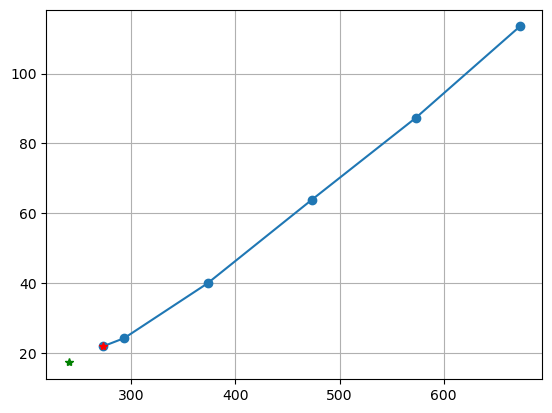

In [28]:
plt.figure()
plt.plot(T,D,'-o')
plt.grid(True)
Tscalar = AssignQuantity(273.15,'kelvin')
Dscalar_orig = getDofT_orig(Tscalar.magnitude)
print('D_orig =', Dscalar_orig)
Dscalar = getDofT(Tscalar.magnitude)
print('D =', Dscalar)
Dpow = getDofTpow(Tscalar,AssignQuantity)
print('D =', Dpow)


plt.plot(Tscalar,Dscalar,'*r')

Tscalar = AssignQuantity(240,'kelvin')
Dscalar = getDofTpow(Tscalar,AssignQuantity); print(Tscalar)
plt.plot(Tscalar,Dscalar,'*g')

In [7]:
# # This is from engineering toolbox, with the power correction
# D_273 = AssignQuantity(0.219,'cm^2/s')
# D_273.ito('micrometer^2/microsecond'); print(D_273)
# T0 = AssignQuantity(273,'kelvin')
# P0 = AssignQuantity(1,'atm') 
# acoef = 2.072
# D = D_273*(Temp/T0)**acoef/(Pressure/P0); print('acoef method says D = ', D)